# *GLCM - DWT - LDP - HOG* feature extractors + ML Model


# Importing Data and Libraries

In [ ]:
from google.colab import drive
from shutil import copyfile
import os

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Importing the train and test sets:

In [ ]:
## Train data importing:

import glob

train_covid_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/train/covid/*g')
train_normal_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/train/normal/*g')
train_pneumonia_bacterial_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/train/pneumonia_bacterial/*g')
train_pneumonia_viral_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/train/pneumonia_viral/*g')

print('For the training set:\nThe count of covid cases is {} and the count of normal cases is {} and the count of pneumonia_bacterial cases is {} and the count of pneumonia_viral cases is {}'.format(len(train_covid_path),len(train_normal_path),len(train_pneumonia_bacterial_path),len(train_pneumonia_viral_path)))

For the training set:
The count of covid cases is 406 and the count of normal cases is 406 and the count of pneumonia_bacterial cases is 460 and the count of pneumonia_viral cases is 441


In [ ]:
## Test data importing:

test_covid_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/test/covid/*g')
test_normal_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/test/normal/*g')
test_pneumonia_bacterial_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/test/pneumonia_bacterial/*g')
test_pneumonia_viral_path = glob.glob('/content/drive/MyDrive/Grad_pro Dataset/test/pneumonia_viral/*g')

print('For the testing set:\nThe count of covid cases is {} and the count of normal cases is {} and the count of pneumonia_bacterial cases is {} and the count of pneumonia_viral cases is {}'.format(len(test_covid_path),len(test_normal_path),len(test_pneumonia_bacterial_path),len(test_pneumonia_viral_path)))

For the testing set:
The count of covid cases is 85 and the count of normal cases is 80 and the count of pneumonia_bacterial cases is 80 and the count of pneumonia_viral cases is 80


# Creating functions

In [ ]:
from skimage.io import imread as Imread
from skimage.transform import resize

def image_read(train_image):
  dim = (100,100,3)
  image = Imread(train_image)
  img_resized = resize(image, dim, anti_aliasing=True, mode='reflect')  
  return img_resized

In [ ]:
import cv2

def cv_read(train_image):
  im = cv2.imread(train_image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  return im

In [ ]:
from skimage import feature

def lbp_features(image,eps=1e-7):
    numPoints, radius = 24, 8
    lbp = feature.local_binary_pattern(image, numPoints,radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3), range=(0, numPoints + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
    #hist = [hist+5 if eps==1e-5 else hist-1]
    return hist

In [ ]:
from scipy.stats import itemfreq
from skimage.feature import greycomatrix, greycoprops,local_binary_pattern

def glcm_features(train_image):
  ngcm= greycomatrix(train_image, [5], [0], 256, symmetric=False, normed=True)  
  contrast = greycoprops(ngcm, 'contrast')
  radius = 2
  no_points = 8*radius
  lbp = local_binary_pattern(train_image, no_points, radius, method='uniform')
  x = itemfreq(lbp.ravel())
  hist = x[:, 1]/sum(x[:, 1])
  hist = hist*10.0
  return hist

In [ ]:
import pywt
import pywt.data

def dwt_features(train_image):
  coeffs2 = pywt.dwt(train_image, 'bior1.3')
  hist = np.array(coeffs2).flatten()
  return hist

In [ ]:
from skimage.feature import hog

def hog_features(train_image):
  feat4, _ = hog(train_image,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))
  return feat4[:200]

# Importing training and testing data

### TRAIN DATA

In [ ]:
import numpy as np

train,train_label = [],[]
img_hist = []
i = 0
for train_image in train_covid_path:

    img_resized = image_read(train_image)
    im = cv_read(train_image)
    
    feat1 = glcm_features(im)
    feat2 = lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1)+ list(feat2)+list(feat3) + list(feat4) 
    train.append(img_hist)
    train_label.append(0)
    i +=1
    print(i)

In [ ]:
i = 0
for train_image in train_normal_path:

    img_resized = image_read(train_image)
    im = cv_read(train_image)
    feat1 = glcm_features(im)
    feat2= lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1) +list(feat2) + list(feat3) + list(feat4) 
    train.append(img_hist)
    train_label.append(1)
    i +=1
    print(i)

In [ ]:
i = 0
for train_image in train_pneumonia_bacterial_path:

    img_resized = image_read(train_image)
    im = cv_read(train_image)
    feat1 = glcm_features(im)
    feat2= lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1) +list(feat2) + list(feat3) + list(feat4) 
    train.append(img_hist)
    train_label.append(2)
    i +=1
    print(i)

In [ ]:
i = 0
for train_image in train_pneumonia_viral_path:

    img_resized = image_read(train_image)
    im = cv_read(train_image)
    feat1 = glcm_features(im)
    feat2= lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1) +list(feat2) + list(feat3) + list(feat4) 
    train.append(img_hist)
    train_label.append(3)
    i +=1
    print(i)

### TEST DATA

In [ ]:
img_hist = []
test,test_label = [],[]
i = 0
for train_image in test_covid_path:
    img_resized = image_read(train_image)
    im = cv_read(train_image)
    
    feat1 = glcm_features(im)
    feat2 = lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1)+ list(feat2) + list(feat4) + list(feat3) 
    test.append(img_hist)
    test_label.append(0)
    i += 1
    print(i)
for train_image in test_normal_path:
    img_resized = image_read(train_image)
    im = cv_read(train_image)
    feat1 = glcm_features(im)
    feat2= lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1)+ list(feat2) + list(feat3) + list(feat4) 
    test.append(img_hist)
    test_label.append(1)
    i += 1
    print(i)
for train_image in test_pneumonia_bacterial_path:
    img_resized = image_read(train_image)
    im = cv_read(train_image)
    feat1 = glcm_features(im)
    feat2= lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1)+ list(feat2) + list(feat3) + list(feat4) 
    test.append(img_hist)
    test_label.append(2)
    i += 1
    print(i)


for train_image in test_pneumonia_viral_path:
    img_resized = image_read(train_image)
    im = cv_read(train_image)
    feat1 = glcm_features(im)
    feat2= lbp_features(im)
    feat3 = hog_features(im)
    feat4 = dwt_features(img_resized)

    img_hist = list(feat1)+ list(feat2) + list(feat3) + list(feat4) 
    test.append(img_hist)
    test_label.append(3)
    i += 1
    print(i)    

In [ ]:
test_images = np.array(test)
y_test = np.array(test_label)
test_images.shape

(325, 80244)

In [ ]:
images = np.array(train)
y = np.array(train_label)
images.shape

(1713, 80244)

# Delete correlated features

In [ ]:
# Getting extracted features
import pandas as pd
df = pd.DataFrame(images[:,:244])
df_test = pd.DataFrame(test_images[:,:244])

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.97
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]

# Drop correlated features 
df.drop(to_drop, axis=1, inplace=True)
df_test.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.shape

(1713, 233)

In [ ]:
df_test.shape

(325, 233)

In [ ]:
## Create a new set of only useful features
df2 = pd.concat([df,pd.DataFrame(images[:,244:])],axis=1)
df2.shape

(1713, 80233)

In [ ]:
df_test2 = pd.concat([df_test ,pd.DataFrame(test_images[:,244:])],axis=1)

df_test2.shape

(325, 80233)

In [ ]:
X = df2.iloc[:,:].values
X_test = df_test2.iloc[:,:].values

In [ ]:
X.shape

(1713, 80233)

In [ ]:
X_test.shape

(325, 80233)

# Modeling

## Model Training and Validating

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics
from sklearn.model_selection import cross_validate

In [ ]:
metrics_needed = ['accuracy','recall_macro','precision_macro','f1_macro']

In [ ]:
svc = svm.SVC(kernel='rbf', C=18,gamma=0.0001, random_state=22)
scores = cross_validate(svc, X, y,cv=5,return_train_score=True,scoring=metrics_needed)

scores

In [ ]:
scores['test_score'].mean()

0.9586312038599901

In [ ]:
scores['fit_time'].mean()

115.65074977874755

In [ ]:
115.65074977874755/365

0.3168513692568426

In [ ]:
scores['train_score'].mean()

0.9859891282935893

## Model testing:

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
classes_names = ['covid-19','normal','pneumonia bacterial','pneumonia viral']

classes = {0:{'sensitivity': [], 'specifity': [], 'precision': [], 'accuracy': [], 'recall' : []},
           1:{'sensitivity': [], 'specifity': [], 'precision': [], 'accuracy': [], 'recall' : []},
           2:{'sensitivity': [], 'specifity': [], 'precision': [], 'accuracy': [], 'recall' : []},
           3:{'sensitivity': [], 'specifity': [], 'precision': [], 'accuracy': [], 'recall' : []}}

In [ ]:
def get_param(multilabel_confusion_matrix):

  return multilabel_confusion_matrix[0,0],multilabel_confusion_matrix[0,1],multilabel_confusion_matrix[1,0],multilabel_confusion_matrix[1,1]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,random_state = 51)

clf = svm.SVC(C=18,gamma=0.0001,kernel='rbf')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [ ]:
cmf_matrix = multilabel_confusion_matrix(y_test, pred).ravel()
cmf_matrix = np.array(cmf_matrix)

#print('confusion matrix for the four classes are',cmf_matrix)
for i in range(4):
    print('\nThe confusion matrix and the calculations for the {} class:'.format(classes_names[i]))
    tp,fp,fn,tn = cmf_matrix[i*4:(i*4)+4]
    print(cmf_matrix[i*4:(i*4)+4])
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)


The confusion matrix and the calculations for the covid-19 class:
[238   2   0  85]
F1-Score: 0.99581589958159
Recall: 1.0
Precision : 0.9916666666666667

The confusion matrix and the calculations for the normal class:
[239   6   6  74]
F1-Score: 0.9755102040816327
Recall: 0.9755102040816327
Precision : 0.9755102040816327

The confusion matrix and the calculations for the pneumonia bacterial class:
[219  26   7  73]
F1-Score: 0.9299363057324841
Recall: 0.9690265486725663
Precision : 0.8938775510204081

The confusion matrix and the calculations for the pneumonia viral class:
[234  11  32  48]
F1-Score: 0.9158512720156556
Recall: 0.8796992481203008
Precision : 0.9551020408163265


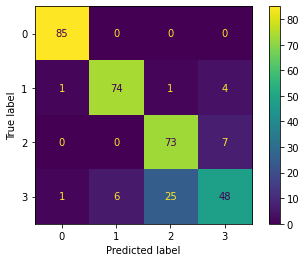

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,random_state = 43)

clf = svm.SVC(C=18,gamma=0.0001,kernel='rbf')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)


The confusion matrix and the calculations for the covid-19 class:
[239   1   0  85]
F1-Score: 0.9979123173277662
Recall: 1.0
Precision : 0.9958333333333333

The confusion matrix and the calculations for the normal class:
[239   6   3  77]
F1-Score: 0.9815195071868583
Recall: 0.987603305785124
Precision : 0.9755102040816327

The confusion matrix and the calculations for the pneumonia bacterial class:
[220  25   4  76]
F1-Score: 0.9381663113006395
Recall: 0.9821428571428571
Precision : 0.8979591836734694

The confusion matrix and the calculations for the pneumonia viral class:
[239   6  31  49]
F1-Score: 0.9281553398058253
Recall: 0.8851851851851852
Precision : 0.9755102040816327


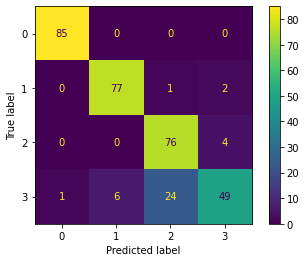

In [ ]:
cmf_matrix = multilabel_confusion_matrix(y_test, pred).ravel()
cmf_matrix = np.array(cmf_matrix)

#print('confusion matrix for the four classes are',cmf_matrix)
for i in range(4):
    print('\nThe confusion matrix and the calculations for the {} class:'.format(classes_names[i]))
    tp,fp,fn,tn = cmf_matrix[i*4:(i*4)+4]
    print(cmf_matrix[i*4:(i*4)+4])
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

plot_confusion_matrix(clf, X_test, y_test)  


The confusion matrix and the calculations for the covid-19 class:
[239   1   0  85]
F1-Score: 0.9979123173277662
Recall: 1.0
Precision : 0.9958333333333333

The confusion matrix and the calculations for the normal class:
[240   5   3  77]
F1-Score: 0.9836065573770492
Recall: 0.9876543209876543
Precision : 0.9795918367346939

The confusion matrix and the calculations for the pneumonia bacterial class:
[220  25   7  73]
F1-Score: 0.9322033898305084
Recall: 0.9691629955947136
Precision : 0.8979591836734694

The confusion matrix and the calculations for the pneumonia viral class:
[236   9  30  50]
F1-Score: 0.9236790606653621
Recall: 0.8872180451127819
Precision : 0.963265306122449


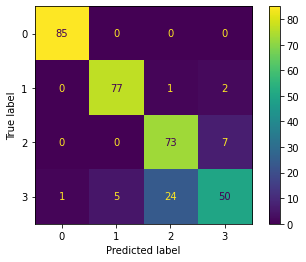

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,random_state = 32)

clf = svm.SVC(C=18,gamma=0.0001,kernel='rbf')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cmf_matrix = multilabel_confusion_matrix(y_test, pred).ravel()
cmf_matrix = np.array(cmf_matrix)

#print('confusion matrix for the four classes are',cmf_matrix)
for i in range(4):
    print('\nThe confusion matrix and the calculations for the {} class:'.format(classes_names[i]))
    tp,fp,fn,tn = cmf_matrix[i*4:(i*4)+4]
    print(cmf_matrix[i*4:(i*4)+4])
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

plot_confusion_matrix(clf, X_test, y_test)  


The confusion matrix and the calculations for the covid-19 class:
[239   1   0  85]
F1-Score: 0.9979123173277662
Recall: 1.0
Precision : 0.9958333333333333

The confusion matrix and the calculations for the normal class:
[239   6   2  78]
F1-Score: 0.9835390946502057
Recall: 0.991701244813278
Precision : 0.9755102040816327

The confusion matrix and the calculations for the pneumonia bacterial class:
[218  27   5  75]
F1-Score: 0.9316239316239315
Recall: 0.9775784753363229
Precision : 0.889795918367347

The confusion matrix and the calculations for the pneumonia viral class:
[239   6  33  47]
F1-Score: 0.9245647969052225
Recall: 0.8786764705882353
Precision : 0.9755102040816327


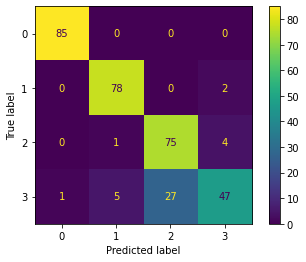

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,random_state = 27)

clf = svm.SVC(C=18,gamma=0.0001,kernel='rbf')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cmf_matrix = multilabel_confusion_matrix(y_test, pred).ravel()
cmf_matrix = np.array(cmf_matrix)


for i in range(4):
    print('\nThe confusion matrix and the calculations for the {} class:'.format(classes_names[i]))
    tp,fp,fn,tn = cmf_matrix[i*4:(i*4)+4]
    print(cmf_matrix[i*4:(i*4)+4])
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,random_state = 42)

clf = svm.SVC(C=18,gamma=0.0001,kernel='rbf')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cmf_matrix = multilabel_confusion_matrix(y_test, pred).ravel()
cmf_matrix = np.array(cmf_matrix)

#print('confusion matrix for the four classes are',cmf_matrix)


The confusion matrix and the calculations for the covid-19 class:
[239   1   0  85]
F1-Score: 0.9979123173277662
Recall: 1.0
Precision : 0.9958333333333333

The confusion matrix and the calculations for the normal class:
[237   8   3  77]
F1-Score: 0.9773195876288661
Recall: 0.9875
Precision : 0.9673469387755103

The confusion matrix and the calculations for the pneumonia bacterial class:
[222  23   5  75]
F1-Score: 0.940677966101695
Recall: 0.9779735682819384
Precision : 0.9061224489795918

The confusion matrix and the calculations for the pneumonia viral class:
[239   6  30  50]
F1-Score: 0.9299610894941635
Recall: 0.8884758364312267
Precision : 0.9755102040816327


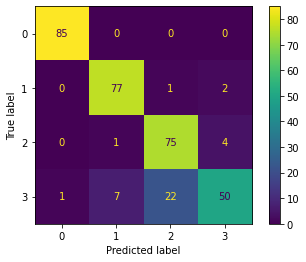

In [ ]:
for i in range(4):
    print('\nThe confusion matrix and the calculations for the {} class:'.format(classes_names[i]))
    tp,fp,fn,tn = cmf_matrix[i*4:(i*4)+4]
    print(cmf_matrix[i*4:(i*4)+4])
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

plot_confusion_matrix(clf, X_test, y_test)  


The confusion matrix and the calculations for the covid-19 class:
[239   1   0  85]
F1-Score: 0.9979123173277662
Recall: 1.0
Precision : 0.9958333333333333

The confusion matrix and the calculations for the normal class:
[240   5   3  77]
F1-Score: 0.9836065573770492
Recall: 0.9876543209876543
Precision : 0.9795918367346939

The confusion matrix and the calculations for the pneumonia bacterial class:
[215  30   4  76]
F1-Score: 0.9267241379310344
Recall: 0.9817351598173516
Precision : 0.8775510204081632

The confusion matrix and the calculations for the pneumonia viral class:
[240   5  34  46]
F1-Score: 0.9248554913294798
Recall: 0.8759124087591241
Precision : 0.9795918367346939


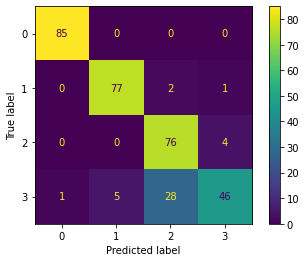

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,random_state = 12)

clf = svm.SVC(C=18,gamma=0.0001,kernel='rbf')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cmf_matrix = multilabel_confusion_matrix(y_test, pred).ravel()
cmf_matrix = np.array(cmf_matrix)

#print('confusion matrix for the four classes are',cmf_matrix)
for i in range(4):
    print('\nThe confusion matrix and the calculations for the {} class:'.format(classes_names[i]))
    tp,fp,fn,tn = cmf_matrix[i*4:(i*4)+4]
    print(cmf_matrix[i*4:(i*4)+4])
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

plot_confusion_matrix(clf, X_test, y_test)  

## Not useful

In [ ]:
    i =0  
    tp,fp,fn,tn = [239 , 1 ,  0 , 85]
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)
    i =1
    tp,fp,fn,tn = [239 ,  6 ,  2 , 78]
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)
    i =2
    tp,fp,fn,tn = [218 , 27,   7  ,75]
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

    i=3
    tp,fp,fn,tn = [239  ,6 , 33, 47]
    recall = tp /(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall / (precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print('F1-Score:',f1)
    print('Recall:',recall)
    print('Precision :',precision)
    classes[i]['sensitivity'].append(sensitivity)
    classes[i]['specifity'].append(specifity)
    classes[i]['precision'].append(precision)
    classes[i]['accuracy'].append(accuracy)
    classes[i]['recall'].append(recall)

F1-Score: 0.9979123173277662
Recall: 1.0
Precision : 0.9958333333333333
F1-Score: 0.9835390946502057
Recall: 0.991701244813278
Precision : 0.9755102040816327
F1-Score: 0.9276595744680851
Recall: 0.9688888888888889
Precision : 0.889795918367347
F1-Score: 0.9245647969052225
Recall: 0.8786764705882353
Precision : 0.9755102040816327


# Final results 

In [ ]:
def Average(lst): 
    return sum(lst) / len(lst)

In [ ]:
for i in range(4):
  print('For the class : {}'.format(classes_names[i]))
  accuracy,precision,recall,sensitivity,specifity = classes[i]['accuracy'],classes[i]['precision'],classes[i]['recall'],classes[i]['sensitivity'],classes[i]['specifity']
  print('The accuracy of the model: {} +/- {}'.format(Average(accuracy),(Average(abs(accuracy-Average(accuracy))**2))**0.5 )  )
  print('The precision of the model: {} +/- {}'.format(Average(precision),(Average(abs(precision-Average(precision))**2))**0.5 )  )
  print('The recall of the model: {} +/- {}'.format(Average(recall),(Average(abs(recall-Average(recall))**2))**0.5 )  )
  print('The sensitivity of the model: {} +/- {}'.format(Average(sensitivity),(Average(abs(sensitivity-Average(sensitivity))**2))**0.5 )  )
  print('The specifity of the model: {} +/- {}'.format(Average(specifity),(Average(abs(specifity-Average(specifity))**2))**0.5 )  )

For the class : covid-19
The accuracy of the model: 0.9964102564102563 +/- 0.0011467015269229733
The precision of the model: 0.9951388888888889 +/- 0.0015528249843748485
The recall of the model: 1.0 +/- 0.0
The sensitivity of the model: 1.0 +/- 0.0
The specifity of the model: 0.9864786598948587 +/- 0.004233845185945854
For the class : normal
The accuracy of the model: 0.9712820512820514 +/- 0.004918801562372038
The precision of the model: 0.9755102040816325 +/- 0.0040816326530612
The recall of the model: 0.9862705661092238 +/- 0.0050397572695213685
The sensitivity of the model: 0.9862705661092238 +/- 0.0050397572695213685
The specifity of the model: 0.9275355675623174 +/- 0.011108409945849216
For the class : pneumonia bacterial
The accuracy of the model: 0.9035897435897436 +/- 0.006567306910187561
The precision of the model: 0.8938775510204082 +/- 0.008817334283548112
The recall of the model: 0.9762699341409582 +/- 0.00535334434676477
The sensitivity of the model: 0.9762699341409582 +/

In [ ]:
accuracy, precision, recall, sensitivity, specifity = 0,0,0,0,0
for i in range(4):
  accuracy += np.array(classes[i]['accuracy']).mean()  
  precision += np.array(classes[i]['precision']).mean()
  recall += np.array(classes[i]['recall']).mean()
  sensitivity += np.array(classes[i]['sensitivity']).mean()
  specifity += np.array(classes[i]['specifity']).mean()

accuracy,precision,recall,sensitivity,specifity = accuracy/4,precision/4,recall/4,sensitivity/4,specifity/4 


print('The accuracy of the model: {}'.format((accuracy) ) )
print('The precision of the model: {}'.format((precision) ) )
print('The recall of the model: {}'.format((recall) ) )
print('The sensitivity of the model: {}'.format((sensitivity) ) )
print('The specifity of the model: {}'.format((specifity) ) )

The accuracy of the model: 0.9712820512820514
The precision of the model: 0.9588187358276644
The recall of the model: 0.9612670914874144
The sensitivity of the model: 0.9612670914874144
The specifity of the model: 0.8820812542108092
